## 객체검출 API를 이용한 사진속 개체 검출

In [29]:
import urllib3
import json
import base64

기본url 및 사용자 인증키, 대상 이미지, 파일 형식 정의

In [30]:
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"
accessKey = "fdf16766-d73d-48be-a4b3-c03276a6cfb2"     # 개인 인증키
imageFilePath = "./data/거리1.jpg"                     # 대상 이미지
type = "jpg"                                           # 이미지 형식, 파일 확장자

대상파일 읽어와 base64모듈을 이용 decode 진행

In [31]:
file = open(imageFilePath, "rb")
imageContents = base64.b64encode(file.read()).decode("utf8")
file.close()

데이터 요청을 위한 딕셔너리 구조의 요청 구문 작성

In [ ]:
requestJson = {
    "access_key": accessKey,
    "argument": {
        "type": type,
        "file": imageContents
    }
}

데이터 요청

In [32]:
http = urllib3.PoolManager()

response = http.request("POST",
                        openApiURL,
                        headers={"Content-Type": "application/json; charset=UTF-8"},
                        body=json.dumps(requestJson)
                       )

요청 결과 확인
- request.status==200 정상

In [33]:
print(f"responseCode={str(response.status)}")

responseCode=200


가져온 데이터의 결과를 json을 이용해 확인

In [34]:
json.loads(response.data)

{'result': 0,
 'return_object': {'data': [{'class': 'person',
    'confidence': '0.995520',
    'x': '306',
    'y': '195',
    'width': '96',
    'height': '213'},
   {'class': 'person',
    'confidence': '0.989643',
    'x': '144',
    'y': '305',
    'width': '38',
    'height': '102'},
   {'class': 'person',
    'confidence': '0.984515',
    'x': '105',
    'y': '315',
    'width': '40',
    'height': '80'},
   {'class': 'person',
    'confidence': '0.979703',
    'x': '465',
    'y': '250',
    'width': '80',
    'height': '163'},
   {'class': 'person',
    'confidence': '0.977255',
    'x': '180',
    'y': '230',
    'width': '87',
    'height': '181'},
   {'class': 'bicycle',
    'confidence': '0.979570',
    'x': '100',
    'y': '356',
    'width': '44',
    'height': '48'},
   {'class': 'car',
    'confidence': '0.935490',
    'x': '392',
    'y': '333',
    'width': '68',
    'height': '71'},
   {'class': 'car',
    'confidence': '0.845532',
    'x': '523',
    'y': '349',
  

가져온 데이터를 이용해 이미지에 객체 표시

In [35]:
import pandas as pd

json_data=json.loads(response.data)
prn_data=json_data["return_object"]['data']
# prn_data

df1=pd.DataFrame(prn_data)
df1

,class,confidence,x,y,width,height
0,person,0.995520,306,195,96,213
1,person,0.989643,144,305,38,102
2,person,0.984515,105,315,40,80
3,person,0.979703,465,250,80,163
4,person,0.977255,180,230,87,181
5,bicycle,0.979570,100,356,44,48
6,car,0.935490,392,333,68,71
7,car,0.845532,523,349,90,56
8,car,0.700785,84,349,29,18
9,car,0.673357,437,348,164,57


In [36]:
df1.dtypes

class         object
confidence    object
x             object
y             object
width         object
height        object
dtype: object

In [37]:
df1=df1.astype({'confidence':'float', 'x':int, 'y':"int", "width":int, 'height':int})
df1.dtypes

class          object
confidence    float64
x               int32
y               int32
width           int32
height          int32
dtype: object

이미지 읽어와 각 개체 표현하기
- 선긋기: draw.line([(x, y), (x, y+h), (x+w, y+h), (x+w, y)])

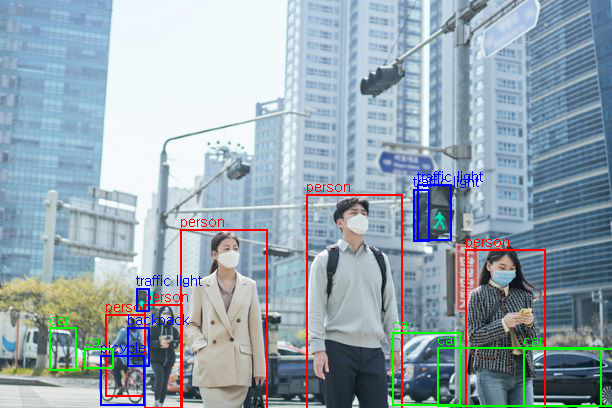

In [38]:
from PIL import Image, ImageDraw, ImageFont

img=Image.open('./data/거리1.jpg')   # 이미지 읽어오기
font=ImageFont.truetype("c:/windows/fonts/gulim.ttc", 15)    # 이미지 적용 폰트 설정
draw=ImageDraw.Draw(img)    # 읽어온 img 객체를 이용해 선긋기 및 confidence 표기

for i in range(len(df1)):
    x=df1.iloc[i, 2]
    y=df1.iloc[i, 3]
    w=df1.iloc[i, 4]
    h=df1.iloc[i, 5]
    
    if df1.iloc[i, 0] =='person':
        color=(255,0,0)
    elif df1.iloc[i, 0] =='car':
        color=(0,255,0)
    else:
        color=(0,0,255)
    
    draw.line([(x, y), (x, y+h), (x+w, y+h), (x+w, y), (x, y)], fill=color, width=2)
    draw.text((x, y-16), df1.iloc[i, 0], font=font, fill=color)
    
img